In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display, clear_output
from tabulate import tabulate

In [2]:
file_path = r'E:\PROJECT - AI & ML\Linear and Logistic Regression\Impact_of_Mobile_Phone_on_Students_Health.csv'

def new_func(file_path):
    return pd.read_csv(file_path)

data = new_func(file_path)

# Display the dataset summary
print("Dataset Summary:")
print(data.describe(include='all'))

# Display the head and tail of the dataset
print("\nDataset Head:")
print(data.head())

print("\nDataset Tail:")
print(data.tail())

Dataset Summary:
       Names    Age Gender  Mobile Phone  Mobile Operating System   \
count    100    100     100           100                      100   
unique   100      4       2             1                        2   
top      Ali  21-25    Male           Yes                  Android   
freq       1     72      81           100                       81   

       Mobile phone use for education Mobile phone activities  \
count                              98                      99   
unique                              4                       7   
top                         Sometimes            All of these   
freq                               53                      59   

       Helpful for studying    Educational Apps Daily usages  \
count                    98                  98           99   
unique                    2                   4            4   
top                     Yes  Educational Videos    4-6 hours   
freq                     94                  54   

In [4]:
file_path = r'E:\PROJECT - AI & ML\Linear and Logistic Regression\Impact_of_Mobile_Phone_on_Students_Health.csv'

def new_func(file_path):
    return pd.read_csv(file_path)

data = new_func(file_path)

# Drop non-numeric and irrelevant columns
data = data.drop(columns=['Names'])

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the dataset summary
print("Dataset Summary:")
print(data.describe(include='all'))

# Display the head and tail of the dataset
print("\nDataset Head:")
print(data.head())

print("\nDataset Tail:")
print(data.tail())

Dataset Summary:
              Age     Gender   Mobile Phone   Mobile Operating System   \
count  100.000000  100.000000          100.0                100.000000   
mean     1.030000    0.810000            0.0                  0.190000   
std      0.658357    0.394277            0.0                  0.394277   
min      0.000000    0.000000            0.0                  0.000000   
25%      1.000000    1.000000            0.0                  0.000000   
50%      1.000000    1.000000            0.0                  0.000000   
75%      1.000000    1.000000            0.0                  0.000000   
max      3.000000    1.000000            0.0                  1.000000   

       Mobile phone use for education  Mobile phone activities  \
count                      100.000000               100.000000   
mean                         1.970000                 1.290000   
std                          1.313912                 1.913773   
min                          0.000000               

In [9]:
# Split the data into features and target variable
X = data.drop(columns=['Performance impact'])  # Assuming 'Performance impact' is the target
y = data['Performance impact']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lin)
print(f'Linear Regression Mean Squared Error: {mse}')
# Logistic Regression (only if the target is binary)
log_reg = None
if len(y.unique()) == 2:
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_log)
    print(f'Logistic Regression Accuracy: {accuracy}')
else:
    print("Logistic Regression is not applicable because the target variable is not binary.")

Linear Regression Mean Squared Error: 3.354534426225613
Logistic Regression is not applicable because the target variable is not binary.


In [6]:
# Function for user input prediction
def predict_from_input(model_type, input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    if model_type == 'linear':
        prediction = lin_reg.predict(input_df)
        return prediction[0]
    elif model_type == 'logistic' and log_reg is not None:
        prediction = log_reg.predict(input_df)
        return prediction[0]

# Function to create a structured tabular output
def create_output_table(model_type, input_data, prediction):
    output_data = input_data.copy()
    output_data['Prediction'] = prediction
    table = pd.DataFrame([output_data])
    print(tabulate(table, headers='keys', tablefmt='pretty'))

In [11]:
# GUI for user input
def create_gui():
    input_widgets = {}
    for column in X.columns:
        if column in label_encoders:
            le = label_encoders[column]
            input_widgets[column] = widgets.Dropdown(
                options=list(le.classes_),
                description=column,
            )
        else:
            input_widgets[column] = widgets.FloatText(description=column)
    
    display_widgets = widgets.VBox(list(input_widgets.values()))
    
    output = widgets.Output()
    
    def on_button_clicked(b):
        with output:
            clear_output()
            input_data = {col: input_widgets[col].value for col in X.columns}
            for col in input_data:
                if col in label_encoders:
                    input_data[col] = label_encoders[col].transform([input_data[col]])[0]
            
            lin_prediction = predict_from_input('linear', input_data)
            print("Linear Regression Prediction:")
            create_output_table('Linear Regression', input_data, lin_prediction)
            
            if log_reg is not None:
                log_prediction = predict_from_input('logistic', input_data)
                print("\nLogistic Regression Prediction:")
                create_output_table('Logistic Regression', input_data, log_prediction)
    
    predict_button = widgets.Button(description="Predict")
    predict_button.on_click(on_button_clicked)
    
    display(display_widgets, predict_button, output)

# Display dataset head and tail
def display_dataset_info():
    print("\nDataset Head:")
    print(tabulate(data.head(), headers='keys', tablefmt='pretty'))
    
    print("\nDataset Tail:")
    print(tabulate(data.tail(), headers='keys', tablefmt='pretty'))

display_dataset_info()
# Create the GUI
create_gui()


Dataset Head:
+---+-----+---------+---------------+--------------------------+--------------------------------+-------------------------+----------------------+------------------+--------------+--------------------+-------------------+----------------+-----------------+--------------+--------------------+----------------+-------------------+--------------------+---------------+
|   | Age | Gender  | Mobile Phone  | Mobile Operating System  | Mobile phone use for education | Mobile phone activities | Helpful for studying | Educational Apps | Daily usages | Performance impact | Usage distraction | Attention span | Useful features | Health Risks | Beneficial subject | Usage symptoms | Symptom frequency | Health precautions | Health rating |
+---+-----+---------+---------------+--------------------------+--------------------------------+-------------------------+----------------------+------------------+--------------+--------------------+-------------------+----------------+-------------

Button(description='Predict', style=ButtonStyle())

Output()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'E:/PROJECT - AI & ML/Linear and Logistic Regression/Impact_of_Mobile_Phone_on_Students_Health.csv'
df = pd.read_csv(file_path)

# Display dataset head and tail
print("Dataset Head:")
print(df.head())
print("\nDataset Tail:")
print(df.tail())

# Encode categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable
X = df.drop(columns='Health rating')
y = df['Health rating']   

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Dataset Head:
      Names    Age Gender  Mobile Phone  Mobile Operating System   \
0       Ali  21-25    Male           Yes                  Android   
1     Bilal  21-25    Male           Yes                  Android   
2    Hammad  21-25    Male           Yes                      IOS   
3  Abdullah  21-25    Male           Yes                  Android   
4     Waqar  21-25    Male           Yes                      IOS   

  Mobile phone use for education Mobile phone activities Helpful for studying  \
0                      Sometimes            Social Media                  Yes   
1                      Sometimes            Social Media                  Yes   
2                      Sometimes            All of these                  Yes   
3                     Frequently            All of these                  Yes   
4                     Frequently            All of these                  Yes   

     Educational Apps Daily usages Performance impact      Usage distraction  \
0  E

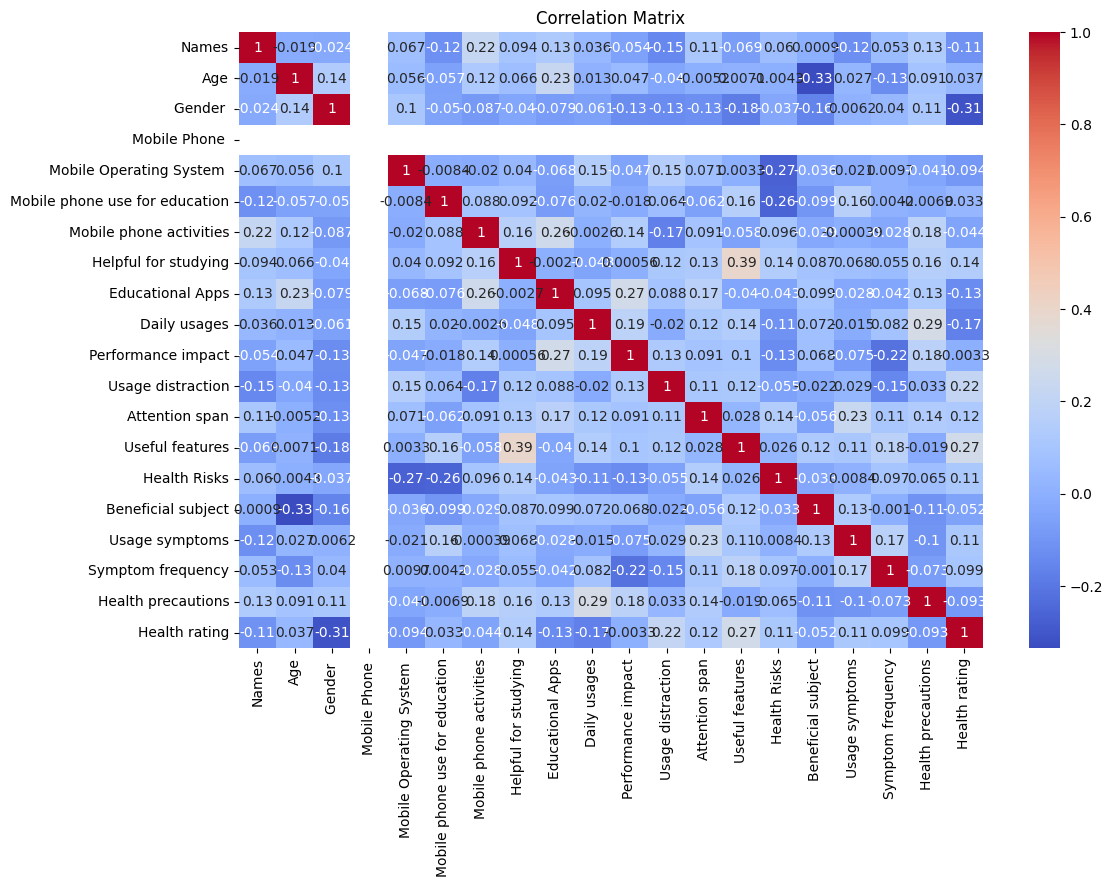

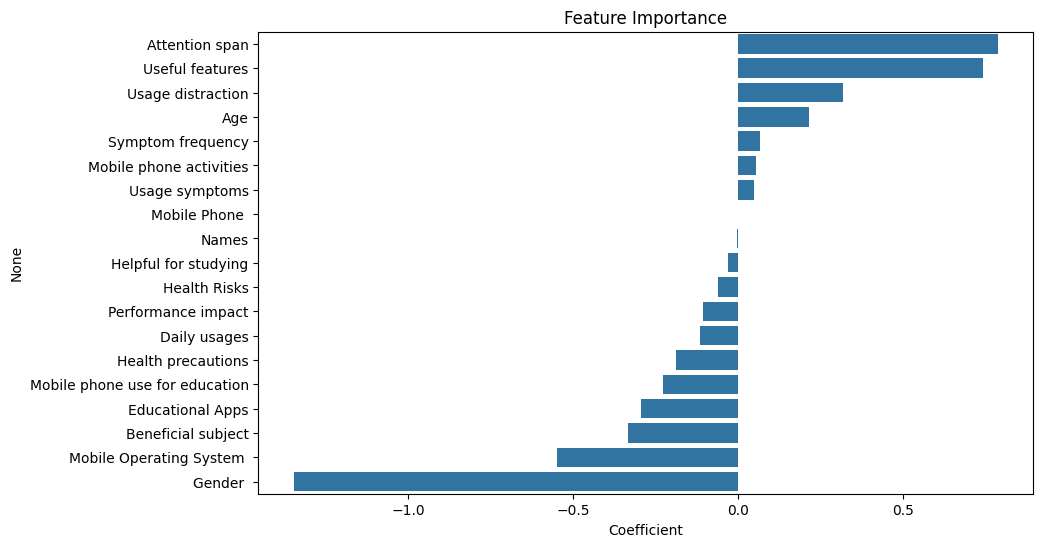

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plotting feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Importance')
plt.show()
